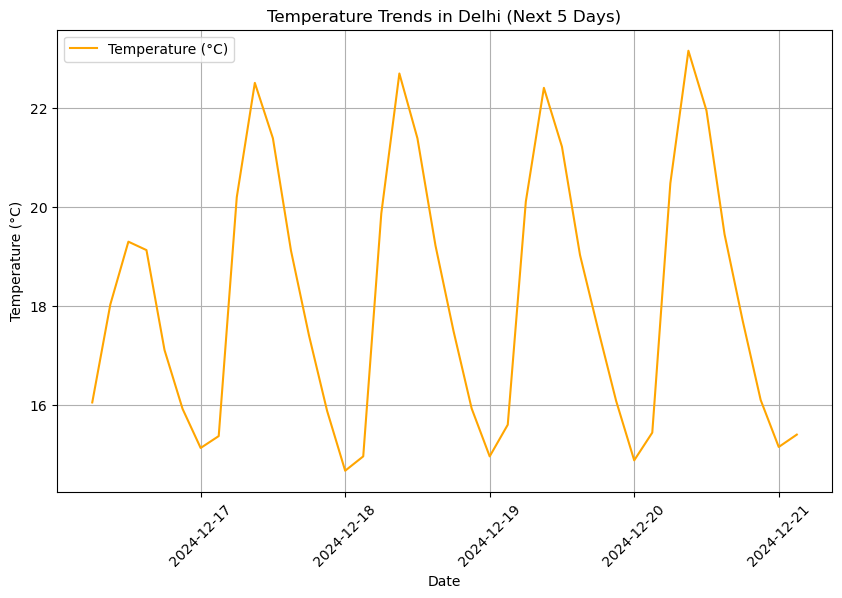

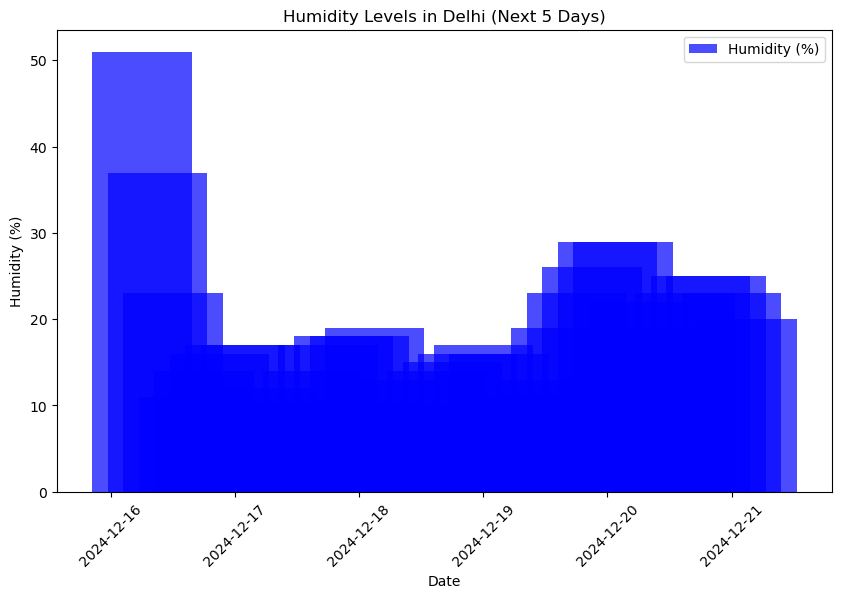

C:\Users\ujjva\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


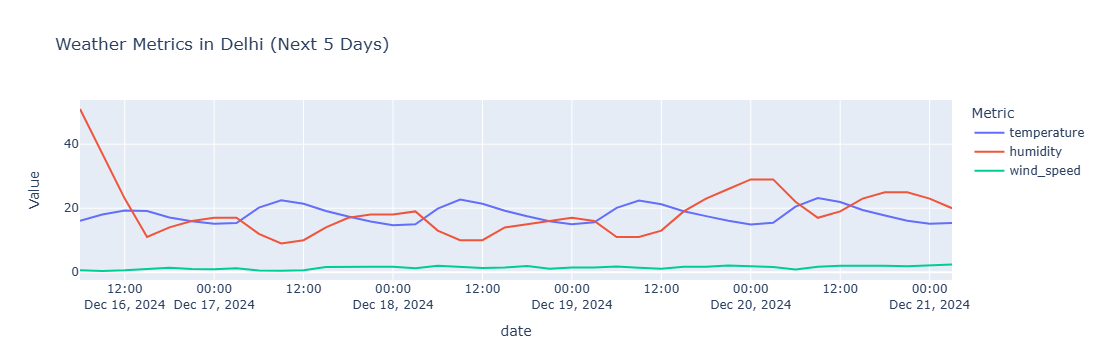

Map saved as 'weather_map.html'. Open it in a browser.


In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import folium

# Replace YOUR_API_KEY with your OpenWeatherMap API key
API_KEY = "b762473e4e7467407e4da136bce24238"

# Function to fetch weather data
def fetch_weather_data(city, days=5):
    url = f"http://api.openweathermap.org/data/2.5/forecast"
    params = {
        "q": city,
        "units": "metric",  # Use Celsius
        "cnt": days * 8,    # 8 data points per day
        "appid": API_KEY,
    }
    response = requests.get(url, params=params)
    if response.status_code == 200:
        return response.json()
    else:
        print("Error fetching data:", response.status_code, response.text)
        return None

# Process the data into a DataFrame
def process_weather_data(data):
    df = pd.DataFrame(data['list'])
    df['date'] = pd.to_datetime(df['dt_txt'])
    df['temperature'] = df['main'].apply(lambda x: x['temp'])
    df['humidity'] = df['main'].apply(lambda x: x['humidity'])
    df['wind_speed'] = df['wind'].apply(lambda x: x['speed'])
    df['weather'] = df['weather'].apply(lambda x: x[0]['description'])
    return df[['date', 'temperature', 'humidity', 'wind_speed', 'weather']]

# Fetch and process weather data
city = "Delhi"
days = 5  # Forecast for 5 days
data = fetch_weather_data(city, days)
if data:
    df = process_weather_data(data)

    # 1. Line Chart: Temperature Trends
    plt.figure(figsize=(10, 6))
    plt.plot(df['date'], df['temperature'], label='Temperature (°C)', color='orange')
    plt.title(f"Temperature Trends in {city} (Next {days} Days)")
    plt.xlabel("Date")
    plt.ylabel("Temperature (°C)")
    plt.grid()
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

    # 2. Bar Chart: Humidity Levels
    plt.figure(figsize=(10, 6))
    plt.bar(df['date'], df['humidity'], color='blue', alpha=0.7, label='Humidity (%)')
    plt.title(f"Humidity Levels in {city} (Next {days} Days)")
    plt.xlabel("Date")
    plt.ylabel("Humidity (%)")
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

    # 3. Interactive Line Chart: All Weather Metrics
    fig = px.line(
        df,
        x='date',
        y=['temperature', 'humidity', 'wind_speed'],
        labels={'value': 'Value', 'variable': 'Metric'},
        title=f"Weather Metrics in {city} (Next {days} Days)"
    )
    fig.show()

    # 4. Geographic Map: Wind Speeds
    # Assume the city has a central latitude/longitude (customize as needed)
    latitude, longitude = 28.6139, 77.2090  # Coordinates for Delhi
    m = folium.Map(location=[latitude, longitude], zoom_start=10)

    # Add wind speed as markers
    for i, row in df.iterrows():
        folium.CircleMarker(
            location=[latitude, longitude],
            radius=row['wind_speed'] / 2,  # Scale marker size by wind speed
            popup=f"{row['date']} - Wind Speed: {row['wind_speed']} m/s",
            color="blue",
            fill=True,
            fill_color="blue"
        ).add_to(m)

    # Save and display map
    m.save("weather_map.html")
    print("Map saved as 'weather_map.html'. Open it in a browser.")

else:
    print("Failed to fetch weather data.")


Current Weather in Kannauj
Temperature: 21.67°C
Humidity: 19%
Condition: Clear sky


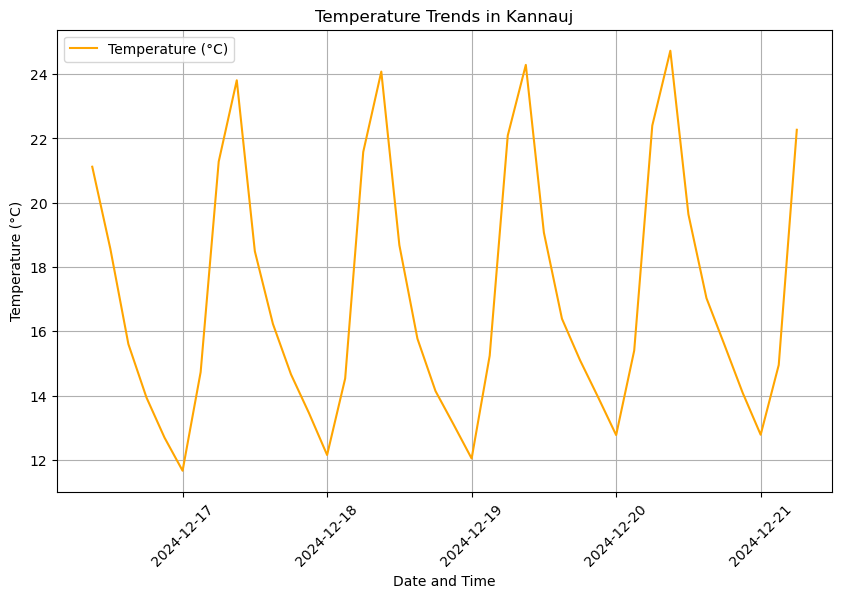

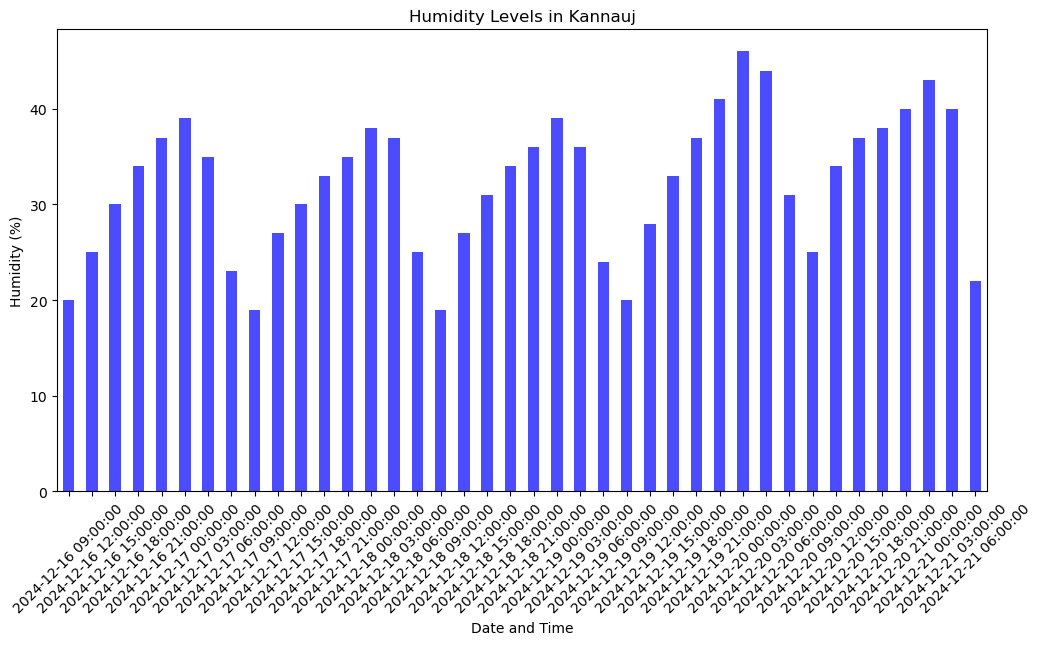

C:\Users\ujjva\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



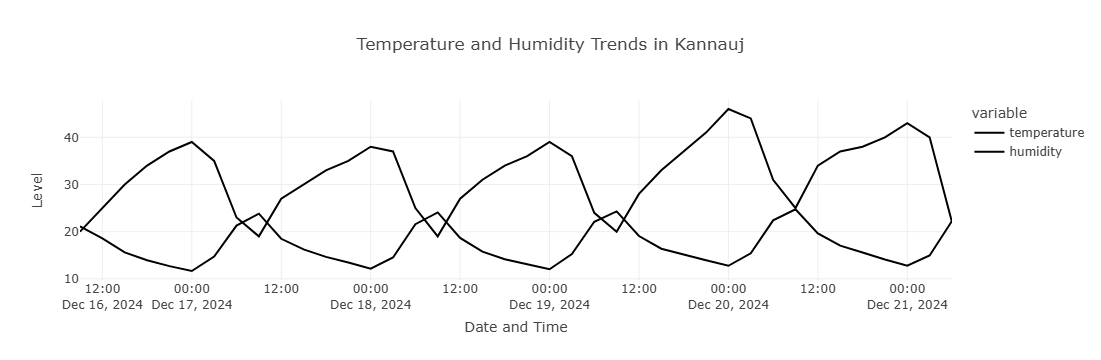

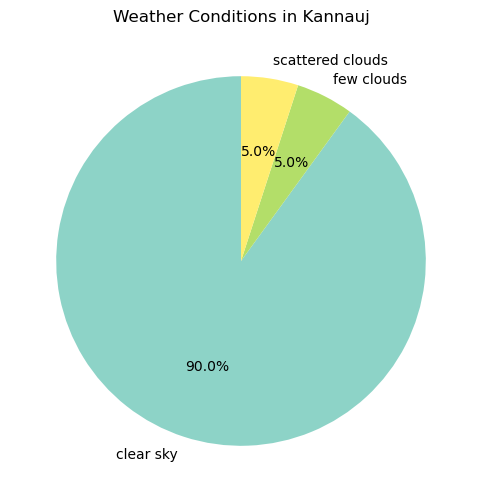

Current weather map saved as 'current_weather_map.html'. Open it in a browser.


In [10]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import folium

# Replace with your OpenWeatherMap API key
API_KEY = "b762473e4e7467407e4da136bce24238"

# Function to fetch current weather data for a city
def fetch_weather_data(city):
    url = f"http://api.openweathermap.org/data/2.5/weather"
    params = {
        "q": city,
        "appid": API_KEY,
        "units": "metric"  # Use metric units (Celsius, meters per second, etc.)
    }
    response = requests.get(url, params=params)
    if response.status_code == 200:
        return response.json()
    else:
        print("Error fetching data:", response.status_code, response.text)
        return None

# Function to fetch 5-day forecast data for a city
def fetch_forecast_data(city):
    url = f"http://api.openweathermap.org/data/2.5/forecast"
    params = {
        "q": city,
        "appid": API_KEY,
        "units": "metric"
    }
    response = requests.get(url, params=params)
    if response.status_code == 200:
        return response.json()
    else:
        print("Error fetching data:", response.status_code, response.text)
        return None

# Fetch current weather
city = "Kannauj"
current_weather = fetch_weather_data(city)

if current_weather:
    print("Current Weather in", city)
    print(f"Temperature: {current_weather['main']['temp']}°C")
    print(f"Humidity: {current_weather['main']['humidity']}%")
    print(f"Condition: {current_weather['weather'][0]['description'].capitalize()}")

# Fetch forecast data
forecast_data = fetch_forecast_data(city)

if forecast_data:
    # Extract relevant data
    forecast_list = forecast_data['list']
    forecast_df = pd.DataFrame([
        {
            "datetime": item['dt_txt'],
            "temperature": item['main']['temp'],
            "humidity": item['main']['humidity'],
            "weather": item['weather'][0]['description'],
            "wind_speed": item['wind']['speed']
        }
        for item in forecast_list
    ])
    forecast_df['datetime'] = pd.to_datetime(forecast_df['datetime'])

    # 1. Line Chart: Temperature Trends
    plt.figure(figsize=(10, 6))
    plt.plot(forecast_df['datetime'], forecast_df['temperature'], label='Temperature (°C)', color='orange')
    plt.title(f"Temperature Trends in {city}")
    plt.xlabel("Date and Time")
    plt.ylabel("Temperature (°C)")
    plt.grid()
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

    # 2. Bar Chart: Humidity Levels
    forecast_df.set_index('datetime')['humidity'].plot(kind='bar', figsize=(12, 6), color='blue', alpha=0.7)
    plt.title(f"Humidity Levels in {city}")
    plt.xlabel("Date and Time")
    plt.ylabel("Humidity (%)")
    plt.xticks(rotation=45)
    plt.show()

    # 3. Interactive Line Chart: Temperature and Humidity
    fig = px.line(forecast_df, x='datetime', y=['temperature', 'humidity'], 
                  labels={"value": "Level", "datetime": "Date and Time"},
                  title=f"Temperature and Humidity Trends in {city}")
    fig.show()

    # 4. Weather Conditions: Pie Chart
    weather_counts = forecast_df['weather'].value_counts()
    weather_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), startangle=90, cmap='Set3')
    plt.title(f"Weather Conditions in {city}")
    plt.ylabel("")
    plt.show()

    # 5. Geographic Map: Current Weather
    if current_weather:
        lat = current_weather['coord']['lat']
        lon = current_weather['coord']['lon']
        m = folium.Map(location=[lat, lon], zoom_start=10)
        folium.Marker(
            [lat, lon],
            popup=f"Current Weather in {city}: {current_weather['weather'][0]['description'].capitalize()}",
            icon=folium.Icon(color="blue")
        ).add_to(m)

        # Save and display map
        m.save("current_weather_map.html")
        print("Current weather map saved as 'current_weather_map.html'. Open it in a browser.")

else:
    print("No forecast data available.")


C:\Users\ujjva\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



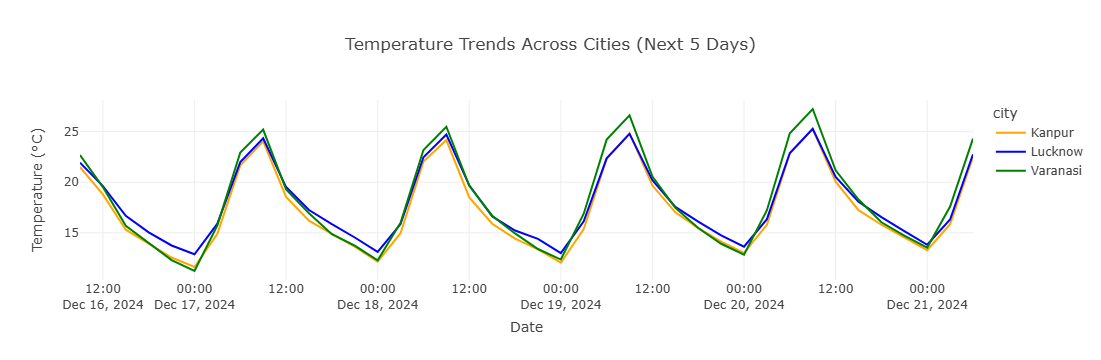

C:\Users\ujjva\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



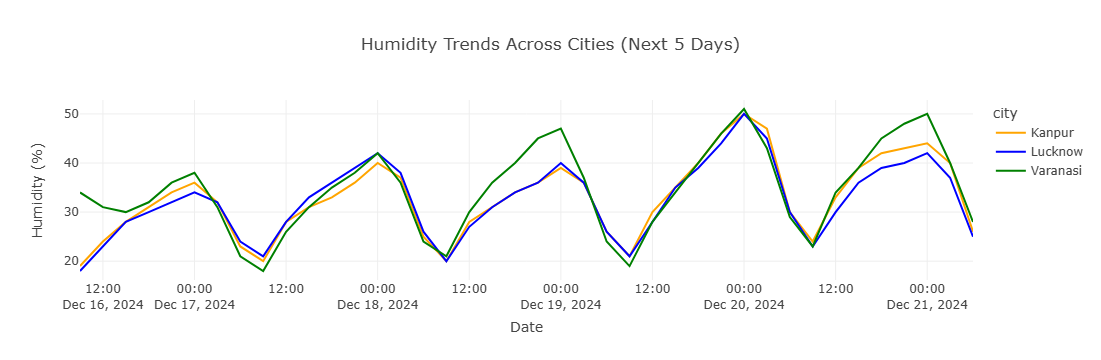

C:\Users\ujjva\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



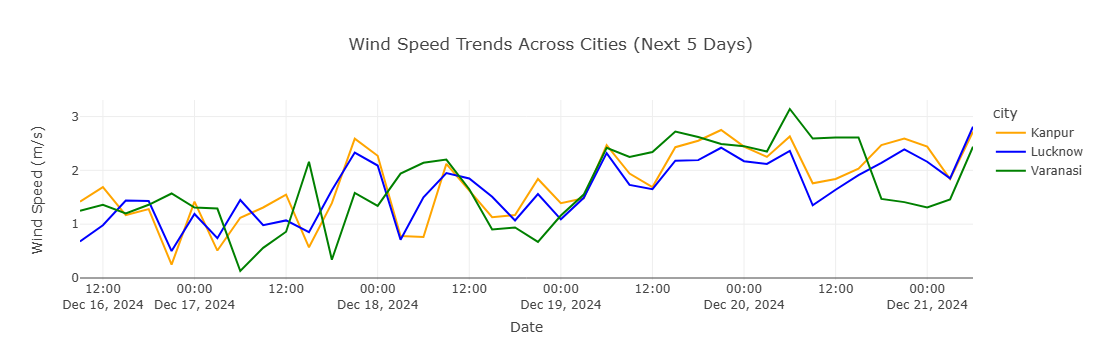

C:\Users\ujjva\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



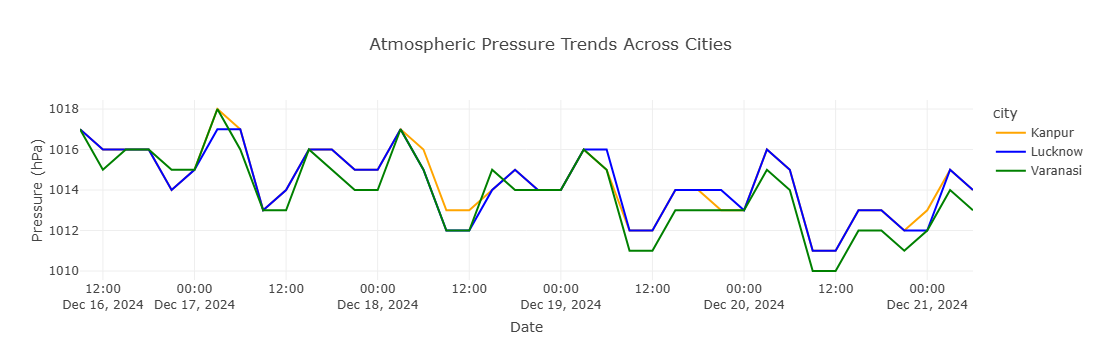

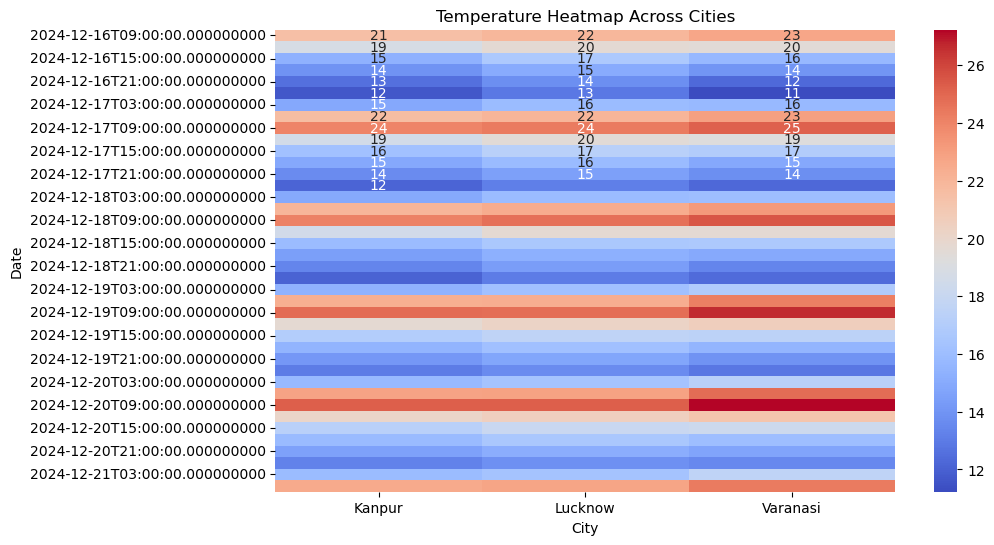

Map saved as 'weather_map_colored.html'. Open it in a browser.


In [14]:
import requests
import pandas as pd
import plotly.express as px
import folium
import seaborn as sns
import matplotlib.pyplot as plt
import streamlit as st

# Replace YOUR_API_KEY with your OpenWeatherMap API key
API_KEY = "b762473e4e7467407e4da136bce24238"

# Function to fetch weather data
def fetch_weather_data(city, days=5):
    url = f"http://api.openweathermap.org/data/2.5/forecast"
    params = {
        "q": city,
        "units": "metric",  # Use Celsius
        "cnt": days * 8,    # 8 data points per day
        "appid": API_KEY,
    }
    response = requests.get(url, params=params)
    if response.status_code == 200:
        return response.json()
    else:
        print("Error fetching data:", response.status_code, response.text)
        return None

# Process the data into a DataFrame
def process_weather_data(data):
    df = pd.DataFrame(data['list'])
    df['date'] = pd.to_datetime(df['dt_txt'])
    df['temperature'] = df['main'].apply(lambda x: x['temp'])
    df['humidity'] = df['main'].apply(lambda x: x['humidity'])
    df['wind_speed'] = df['wind'].apply(lambda x: x['speed'])
    df['pressure'] = df['main'].apply(lambda x: x['pressure'])
    df['cloud_coverage'] = df['clouds'].apply(lambda x: x['all'])
    df['visibility'] = df['visibility'] / 1000  # Convert visibility to kilometers
    df['weather'] = df['weather'].apply(lambda x: x[0]['description'])
    return df[['date', 'temperature', 'humidity', 'wind_speed', 'pressure', 'cloud_coverage', 'visibility', 'weather']]

# Fetch and process weather data
cities = ["Kanpur", "Lucknow", "Varanasi"]
dfs = []

for city in cities:
    data = fetch_weather_data(city, days=5)
    if data:
        df = process_weather_data(data)
        df['city'] = city  # Add a city column
        dfs.append(df)

# Combine data from all cities
df_combined = pd.concat(dfs)

# Color dictionary for cities
city_colors = {
    "Kanpur": "orange",
    "Lucknow": "blue",
    "Varanasi": "green"
}

# Visualization 1: Temperature Trends (Line Chart)
fig = px.line(
    df_combined,
    x="date",
    y="temperature",
    color="city",
    title="Temperature Trends Across Cities (Next 5 Days)",
    labels={"temperature": "Temperature (°C)", "date": "Date"},
    color_discrete_map=city_colors
)
fig.show()

# Visualization 2: Humidity Trends (Line Chart)
fig2 = px.line(
    df_combined,
    x="date",
    y="humidity",
    color="city",
    title="Humidity Trends Across Cities (Next 5 Days)",
    labels={"humidity": "Humidity (%)", "date": "Date"},
    color_discrete_map=city_colors
)
fig2.show()

# Visualization 3: Wind Speed Trends (Line Chart)
fig3 = px.line(
    df_combined,
    x="date",
    y="wind_speed",
    color="city",
    title="Wind Speed Trends Across Cities (Next 5 Days)",
    labels={"wind_speed": "Wind Speed (m/s)", "date": "Date"},
    color_discrete_map=city_colors
)
fig3.show()

# Visualization 4: Pressure Trends (Line Chart)
fig4 = px.line(
    df_combined,
    x="date",
    y="pressure",
    color="city",
    title="Atmospheric Pressure Trends Across Cities",
    labels={"pressure": "Pressure (hPa)", "date": "Date"},
    color_discrete_map=city_colors
)
fig4.show()

# Visualization 5: Heatmap of Temperature Across Cities
pivot_table = df_combined.pivot(index='date', columns='city', values='temperature')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap="coolwarm", annot=True)
plt.title("Temperature Heatmap Across Cities")
plt.xlabel("City")
plt.ylabel("Date")
plt.show()

# Folium map with different colored markers for each city
latitude, longitude = 28.6139, 77.2090  # Coordinates for Delhi (change as needed)
m = folium.Map(location=[latitude, longitude], zoom_start=10)

for i, row in df_combined.iterrows():
    city = row['city']
    wind_speed = row['wind_speed']
    folium.CircleMarker(
        location=[latitude, longitude],
        radius=wind_speed / 2,
        popup=f"{city} - {row['date']} - Wind Speed: {wind_speed} m/s",
        color=city_colors[city],
        fill=True,
        fill_color=city_colors[city]
    ).add_to(m)

m.save("weather_map_colored.html")
print("Map saved as 'weather_map_colored.html'. Open it in a browser.")
